# Linear Regression

In [8]:
import pandas as pd
import numpy as np

In [75]:
df_train = pd.read_csv('/content/sample_data/california_housing_train.csv')

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt


In [11]:
df_test = pd.read_csv('/content/sample_data/california_housing_test.csv')

In [77]:
print(df_test.shape)
print(df_train.shape)

(3000, 9)
(17000, 9)
longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64


In [54]:
X = df_train.drop('median_house_value', axis=1)
y = df_train['median_house_value']

In [20]:
df_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


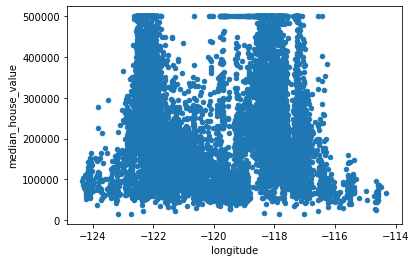

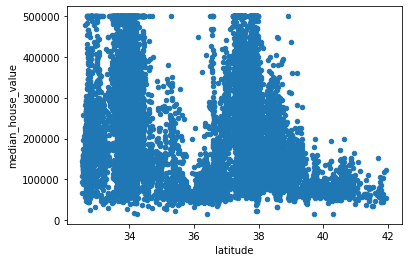

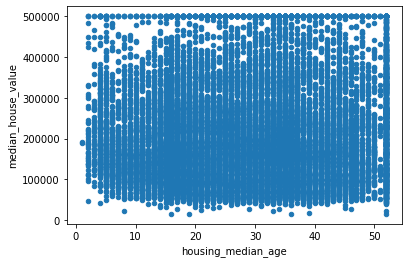

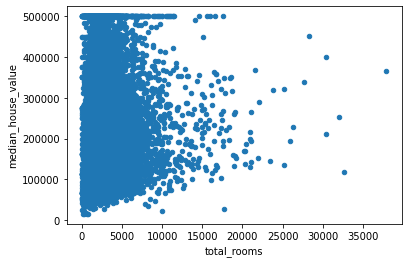

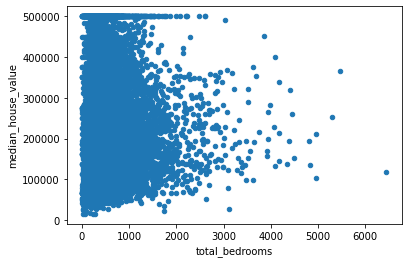

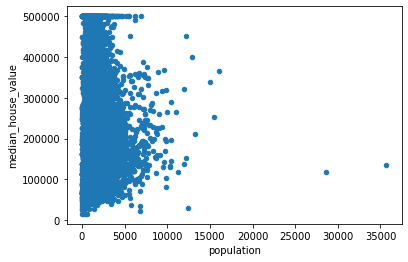

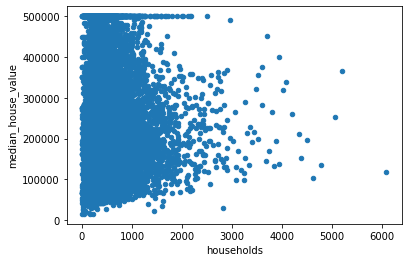

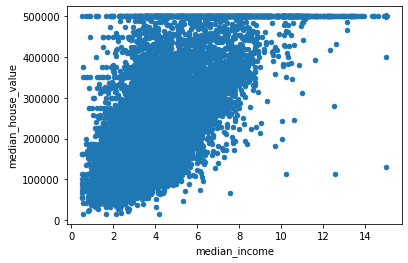

In [26]:
for col in X.columns:
  df_train.plot.scatter(col, "median_house_value")

In [22]:
from sklearn.preprocessing import StandardScaler

In [49]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X)
y_train = scaler.fit_transform(np.array(y).reshape(-1, 1))

In [66]:
reg = LinearRegression(normalize=True)
reg.fit(np.array(X), np.array(y).reshape(-1, 1))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [67]:
X_test = df_test.drop('median_house_value', axis=1)
y_test = df_test['median_house_value']

In [68]:
predictions = reg.predict(np.array(X_test))
print(predictions)
print(y_test.head())

[[352812.31112455]
 [212717.70074517]
 [272344.69951889]
 ...
 [ 88220.58643731]
 [146374.67481455]
 [456779.61107786]]
0    344700.0
1    176500.0
2    270500.0
3    330000.0
4     81700.0
Name: median_house_value, dtype: float64


Menghitung residual

In [69]:
residuals = predictions - np.array(y_test).reshape(-1, 1)

(array([1.000e+00, 5.000e+00, 1.400e+01, 5.300e+01, 1.560e+02, 6.090e+02,
        1.651e+03, 4.790e+02, 3.000e+01, 2.000e+00]),
 array([-495805.82754477, -417235.9826038 , -338666.13766283,
        -260096.29272186, -181526.44778088, -102956.60283991,
         -24386.75789894,   54183.08704204,  132752.93198301,
         211322.77692398,  289892.62186496]),
 <a list of 10 Patch objects>)

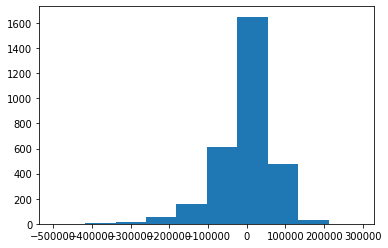

In [70]:
plt.hist(residuals)

Pada histogram diatas bisa dilihat distribusi error yang terjadi, jika diperhatikan banyak data yang nilai residual nya mendekati 0 yang berarti baik tapi terdapat data - data yang hasil prediksi yang sangat salah

In [72]:
print("MSE : " + str(mean_squared_error(predictions, np.array(y_test)) ** 0.5))

MSE : 69765.36022216803


melakukan evaluasi dengan _Mean Squared Error_ lalu melakukan operasi akar.

# Logistic Regression

In [78]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv

--2021-10-03 10:57:05--  https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 84199 (82K) [application/x-httpd-php]
Saving to: ‘winequality-red.csv’

winequality-red.csv 100%[===================>]  82.23K  --.-KB/s    in 0.1s    

2021-10-03 10:57:06 (640 KB/s) - ‘winequality-red.csv’ saved [84199/84199]



In [85]:
df_redwine = pd.read_csv('/content/winequality-red.csv', sep=';')

In [82]:
df_redwine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [83]:
df_redwine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [88]:
# good wine = 1
# bad wine = 0
# 0 <= x <= 5 = bad wine
# <= 6 x <= 10 = good wine

df_redwine.loc[(df_redwine['quality'] >= 0) & (df_redwine['quality'] <= 5), 'quality'] = 0
df_redwine.loc[(df_redwine['quality'] >= 6) & (df_redwine['quality'] <= 10), 'quality'] = 1
df_redwine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


Dataset asli menggunakan 10 label yaitu range kualitas dari 0 - 10. Pada tugas ini saya mengganti nilai {0, 1, 2, 3, 4, 5} menjadi 0 (bad wine) dan {6, 7, 8, 9, 10} menjadi 1 (good wine)

In [89]:
df_redwine.quality.value_counts()

1    855
0    744
Name: quality, dtype: int64

dataset tidak perlu di resampling

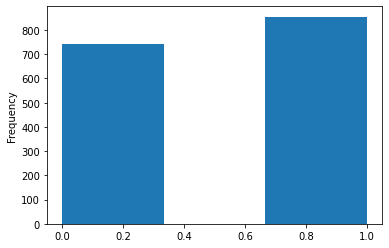

In [99]:
df_redwine['quality'].plot.hist(bins=3)

In [100]:
from sklearn.linear_model import LogisticRegression

In [101]:
X = df_redwine.drop('quality', axis=1)
y = df_redwine['quality']

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [103]:
logreg = LogisticRegression(max_iter=1000)

In [104]:
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [105]:
redwine_preds = logreg.predict(X_test)

In [109]:
print(redwine_preds[:5])
print(y_test.head())

[1 0 1 0 1]
1109    1
1032    0
1002    1
487     1
979     0
Name: quality, dtype: int64


In [117]:
score = redwine_preds + np.array(y_test)
score = score[score != 1].shape[0]/score.shape[0]
print("Accuracy : " + str(score*100) + "%")

Accuracy : 75.41666666666667%


akurasi yang didapatkan sebesar 75% yang tidak terlalu baik

In [118]:
from sklearn.metrics import classification_report

In [120]:
print(classification_report(y_test, redwine_preds))

              precision    recall  f1-score   support

           0       0.74      0.74      0.74       226
           1       0.77      0.76      0.77       254

    accuracy                           0.75       480
   macro avg       0.75      0.75      0.75       480
weighted avg       0.75      0.75      0.75       480



terlihat nilai precision, recall, f1-score berada pada kisaran 74-75 %.

nilai precision : kemampuan classifier untuk tidak melabeli data sebagai nilai positif jika nilai aktualnya negatif  

nilai recall : kemampuan classifier untuk melabeli data sebagai nilai positf dengan benar  

nilai f1-score : rata - rata harmonik terhadap precision dan recall